In [ ]:
import numpy as np
import pandas as pd
from statsmodels.othermod.betareg import BetaModel
from statsmodels.api import add_constant
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


##Beta regressions

Useful explanation: https://towardsdatascience.com/a-guide-to-the-regression-of-rates-and-proportions-bcfe1c35344f


Beta regression is a type of GLM where we assume y follows a beta distribution, and the link function is the logit.

In [ ]:
#read in the data
data = pd.read_csv("final_data.csv")

#shift vlaues of predictors with 0 entries for the shifted beta regression to work
data['pt_ks4_expectations_filled'] /= 100
data['pt_ks4_expectations_filled'] += 0.001
data['pt_ks2_expectations_filled'] /= 100
data['pt_convictions_filled'] /=100
data['pt_substance_filled'] /= 100
data['pt_convictions_filled'] += 0.001
data['pt_substance_filled'] += 0.001
data['pt_ks4_expectations'] /= 100
data['pt_ks4_expectations'] += 0.001
data['pt_ks2_expectations'] /= 100
data['pt_convictions'] /=100
data['pt_substance'] /= 100
data['pt_convictions'] += 0.001
data['pt_substance'] += 0.001


In [ ]:
#scale predictor columns
scaler = MinMaxScaler()
data_scaled = data.copy()
scalable_columns = ['number_in_care', 'number_in_care_filled', 'pt_placed_inside_la', 'pt_private_provis', 'pt_3_more_placemts', 'pt_placed_inside_la_filled','pt_private_provis_filled', 'pt_3_more_placemts_filled', 'per_child_spend', 'budget_per_child']
data_scaled[scalable_columns] = scaler.fit_transform(data_scaled[scalable_columns])
print(data_scaled[scalable_columns].describe())

data = data_scaled

       number_in_care  number_in_care_filled  pt_placed_inside_la  \
count      750.000000             750.000000           747.000000   
mean         0.246364               0.246364             0.613078   
std          0.165839               0.165839             0.189203   
min          0.000000               0.000000             0.000000   
25%          0.140736               0.140736             0.482759   
50%          0.202375               0.202375             0.632184   
75%          0.303919               0.303919             0.747126   
max          1.000000               1.000000             1.000000   

       pt_private_provis  pt_3_more_placemts  pt_placed_inside_la_filled  \
count         747.000000          739.000000                  750.000000   
mean            0.361365            0.515785                    0.611913   
std             0.153186            0.140677                    0.189822   
min             0.000000            0.000000                    0.000000  

In [ ]:
# categorical variables set
data['ofsted_overall'] =data['ofsted_overall'].astype("category")
data['ofsted_overall_filled'] =data['ofsted_overall_filled'].astype("category")
data['ofsted_care'] =data['ofsted_care'].astype("category")
data['ofsted_care_filled'] =data['ofsted_care_filled'].astype("category")
data['ofsted_leaders'] =data['ofsted_leaders'].astype("category")
data['ofsted_leaders_filled'] =data['ofsted_leaders_filled'].astype("category")
data['ofsted_help_protection'] =data['ofsted_help_protection'].astype("category")
data['ofsted_help_protection_filled'] =data['ofsted_help_protection_filled'].astype("category")




In [ ]:
#split into testing and training
datatrain, datatest = train_test_split(data, test_size = 0.25, random_state = 7)
datatrain.head()

,Unnamed: 0,la_code,reporting_year,academic_year,region_code,region_name,la_name,pt_ks2_expectations,pt_ks4_expectations,avg_p8score,...,pt_ks2_expectations_filled,pt_ks4_expectations_filled,avg_p8score_filled,per_child_spend,cla_budget_filled,ofsted_overall_filled,ofsted_leaders_filled,ofsted_care_filled,ofsted_help_protection_filled,budget_per_child
46,464,E08000001,2019,201819.0,E12000002,North West,Bolton,0.33,NaN,-1.49,...,0.330000,0.220375,-1.490000,0.195167,23965.0,3.0,3.0,3.0,3.0,0.195167
629,147,E09000029,2022,202122.0,E13000002,Outer London,Sutton,NaN,NaN,-0.80,...,0.473333,0.316571,-0.800000,0.472411,18481.0,3.0,4.0,3.0,3.0,0.472411
305,689,E10000016,2018,201718.0,E12000008,South East,Kent,0.35,0.169,-1.04,...,0.350000,0.169000,-1.040000,0.360207,101212.0,4.0,4.0,4.0,3.0,0.360207
359,124,E09000023,2022,202122.0,E13000001,Inner London,Lewisham,NaN,0.232,-1.77,...,0.750000,0.232000,-1.770000,0.541268,41160.0,2.0,2.0,2.0,2.0,0.541268
132,405,E06000052,2020,201920.0,E12000009,South West,Cornwall,NaN,0.251,NaN,...,0.371667,0.251000,-1.333977,0.248726,21402.0,4.0,4.0,4.0,3.0,0.248726


#Beta models on filled data


## KS2 expectations

In [ ]:
model = BetaModel(endog = datatrain.pt_ks2_expectations_filled, exog = add_constant(datatrain[['reporting_year','number_in_care_filled', 'ofsted_overall_filled', 'ofsted_care_filled', 'ofsted_help_protection_filled', 'ofsted_leaders_filled', 'per_child_spend', 'pt_private_provis_filled', 'pt_placed_inside_la_filled', 'pt_3_more_placemts_filled']]))
fit = model.fit()
fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  BetaModel Results                                   
======================================================================================
Dep. Variable:     pt_ks2_expectations_filled   Log-Likelihood:                 628.81
Model:                              BetaModel   AIC:                            -1234.
Method:                    Maximum Likelihood   BIC:                            -1182.
Date:                        Sat, 20 Apr 2024                                         
Time:                                16:17:03                                         
No. Observations:                         562                                         
Df Residuals:                             550                                         
Df Model:                                  10                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            63.7528     21.204      3.007      0.003      22.193     105.313
reporting_year                   -0.0316      0.011     -3.007      0.003      -0.052      -0.011
number_in_care_filled            -0.3265      0.105     -3.099      0.002      -0.533      -0.120
ofsted_overall_filled             0.0242      0.059      0.408      0.683      -0.092       0.140
ofsted_care_filled               -0.0028      0.038     -0.073      0.942      -0.078       0.072
ofsted_help_protection_filled    -0.0153      0.041     -0.376      0.707      -0.095       0.065
ofsted_leaders_filled             0.0333      0.041      0.803      0.422      -0.048       0.114
per_child_spend                   0.2163      0.139      1.552      0.121      -0.057       0.490
pt_private_provis_filled         -0.1483      0.136     -1.088      0.276      -0.415       0.119
pt_placed_inside_la_filled       -0.6389      0.111     -5.772      0.000      -0.856      -0.422
pt_3_more_placemts_filled        -0.2486      0.184     -1.354      0.176      -0.608       0.111
precision                         3.6050      0.059     61.211      0.000       3.490       3.720
=================================================================================================
"""

Test MSE: 57.210%, Test RMSE: 7.5637437104109, Test RMSE / std dev.: 0.8652527920423984


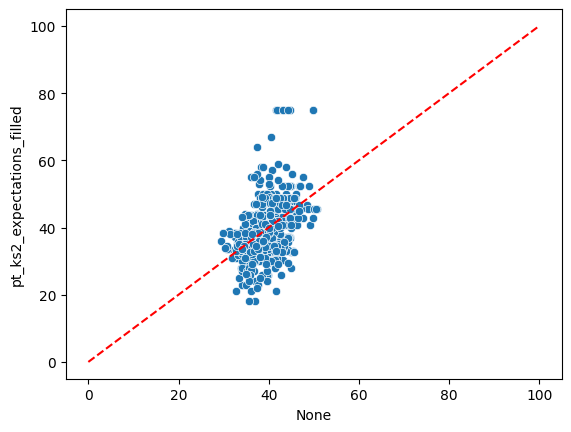

In [ ]:
#visualize model performance

sns.scatterplot(x=fit.fittedvalues *100, y = datatrain['pt_ks2_expectations_filled']*100 )
plt.plot([0, 100], [0, 100], color='red', linestyle='--')

#test mse
test_predictors = add_constant(datatest[['reporting_year','number_in_care_filled', 'ofsted_overall_filled', 'ofsted_care_filled', 'ofsted_help_protection_filled', 'ofsted_leaders_filled', 'per_child_spend', 'pt_private_provis_filled', 'pt_placed_inside_la_filled', 'pt_3_more_placemts_filled']])
mse = ((fit.predict(test_predictors)- datatest['pt_ks2_expectations_filled'])**2).mean()
print(f"Test MSE: {mse*10000:.3f}%, Test RMSE: {np.sqrt(mse*10000)}, Test RMSE / std dev.: {np.sqrt(mse*10000)/ np.std(datatest['pt_ks2_expectations_filled']*100)}")

In [ ]:
((fit.predict(test_predictors)*100 - datatest['pt_ks4_expectations']*100)**2).mean()

200.10908099545333

Text(34.097222222222214, 0.5, '% KS2 expectations ')

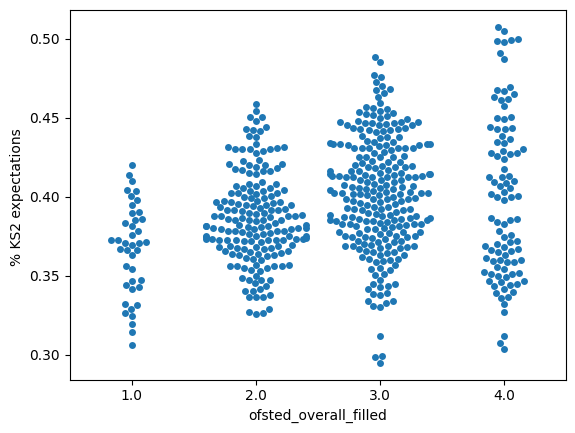

In [ ]:
sns.swarmplot(x=(datatrain.ofsted_overall_filled), y=fit.fittedvalues)
plt.ylabel("% KS2 expectations ")

 For other variables we need to perform shifted beta regression because we cannot have values exactly 0

## % Substance misuse

In [ ]:
model = BetaModel(endog = datatrain.pt_substance_filled, exog = add_constant(datatrain[['reporting_year','number_in_care_filled', 'ofsted_overall_filled', 'ofsted_care_filled', 'ofsted_help_protection_filled', 'ofsted_leaders_filled', 'per_child_spend', 'pt_private_provis_filled', 'pt_placed_inside_la_filled', 'pt_3_more_placemts_filled']]))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               BetaModel Results                               
===============================================================================
Dep. Variable:     pt_substance_filled   Log-Likelihood:                 1275.3
Model:                       BetaModel   AIC:                            -2527.
Method:             Maximum Likelihood   BIC:                            -2475.
Date:                 Sat, 20 Apr 2024                                         
Time:                         16:17:05                                         
No. Observations:                  562                                         
Df Residuals:                      550                                         
Df Model:                           10                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            70.9008     52.951      1.339      0.181     -32.880     174.682
reporting_year                   -0.0368      0.026     -1.402      0.161      -0.088       0.015
number_in_care_filled            -0.1638      0.241     -0.679      0.497      -0.636       0.309
ofsted_overall_filled             0.2651      0.158      1.674      0.094      -0.045       0.576
ofsted_care_filled               -0.0839      0.102     -0.821      0.412      -0.284       0.116
ofsted_help_protection_filled    -0.2443      0.103     -2.380      0.017      -0.445      -0.043
ofsted_leaders_filled             0.0071      0.110      0.065      0.948      -0.208       0.222
per_child_spend                   0.5692      0.308      1.847      0.065      -0.035       1.173
pt_private_provis_filled         -0.0047      0.308     -0.015      0.988      -0.609       0.599
pt_placed_inside_la_filled       -0.1601      0.274     -0.585      0.559      -0.697       0.377
pt_3_more_placemts_filled         0.6931      0.438      1.584      0.113      -0.165       1.551
precision                         3.0842      0.067     45.965      0.000       2.953       3.216
=================================================================================================
"""

Test MSE: 10.519%, Test RMSE: 3.2433259296334036, Test RMSE / std dev.: 0.9670743899742127


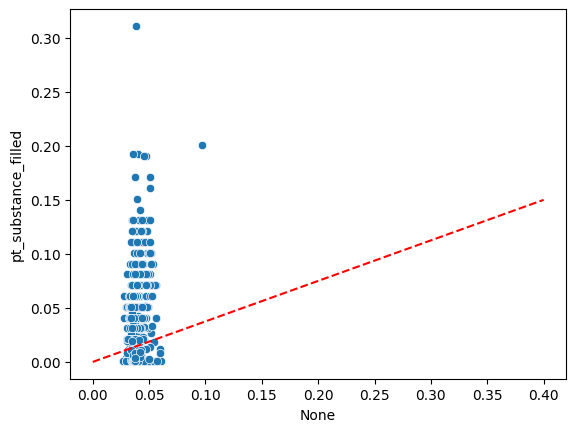

In [ ]:
#visualize model performance

sns.scatterplot(x=fit.fittedvalues, y = datatrain['pt_substance_filled'] )
plt.plot([0, 0.4], [0, 0.15], color='red', linestyle='--')

#test mse
test_predictors = add_constant(datatest[['reporting_year','number_in_care_filled', 'ofsted_overall_filled', 'ofsted_care_filled', 'ofsted_help_protection_filled', 'ofsted_leaders_filled', 'per_child_spend', 'pt_private_provis_filled', 'pt_placed_inside_la_filled', 'pt_3_more_placemts_filled']])
mse = ((fit.predict(test_predictors) - datatest['pt_substance_filled'])**2).mean()
print(f"Test MSE: {mse*10000:.3f}%, Test RMSE: {np.sqrt(mse*10000)}, Test RMSE / std dev.: {np.sqrt(mse*10000)/ np.std(datatest['pt_substance_filled']*100)}")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(33.972222222222214, 0.5, '% substance ')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


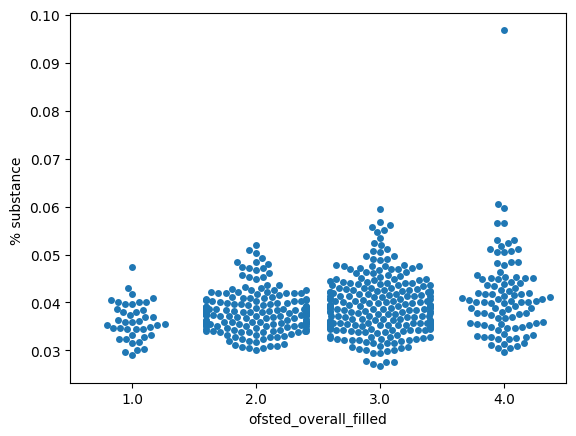

In [ ]:
sns.swarmplot(x=(datatrain.ofsted_overall_filled), y=fit.fittedvalues)
plt.ylabel("% substance ")

## % KS4 expectations

In [ ]:
model = BetaModel(endog = datatrain.pt_ks4_expectations_filled, exog = add_constant(datatrain[['reporting_year','number_in_care_filled', 'ofsted_overall_filled', 'ofsted_care_filled', 'ofsted_help_protection_filled', 'ofsted_leaders_filled', 'per_child_spend', 'pt_private_provis_filled', 'pt_placed_inside_la_filled', 'pt_3_more_placemts_filled']]))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  BetaModel Results                                   
======================================================================================
Dep. Variable:     pt_ks4_expectations_filled   Log-Likelihood:                 665.46
Model:                              BetaModel   AIC:                            -1307.
Method:                    Maximum Likelihood   BIC:                            -1255.
Date:                        Sat, 20 Apr 2024                                         
Time:                                16:17:09                                         
No. Observations:                         562                                         
Df Residuals:                             550                                         
Df Model:                                  10                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -168.8689     25.269     -6.683      0.000    -218.395    -119.343
reporting_year                    0.0832      0.013      6.646      0.000       0.059       0.108
number_in_care_filled            -0.2286      0.125     -1.822      0.068      -0.474       0.017
ofsted_overall_filled             0.1305      0.071      1.832      0.067      -0.009       0.270
ofsted_care_filled               -0.0314      0.046     -0.682      0.495      -0.122       0.059
ofsted_help_protection_filled    -0.0054      0.048     -0.112      0.911      -0.100       0.090
ofsted_leaders_filled            -0.0995      0.050     -1.990      0.047      -0.197      -0.001
per_child_spend                   0.2171      0.166      1.311      0.190      -0.107       0.542
pt_private_provis_filled          0.1297      0.163      0.797      0.426      -0.189       0.449
pt_placed_inside_la_filled       -0.3117      0.130     -2.392      0.017      -0.567      -0.056
pt_3_more_placemts_filled        -0.2786      0.219     -1.270      0.204      -0.709       0.151
precision                         3.4569      0.059     58.602      0.000       3.341       3.572
=================================================================================================
"""

Test MSE: 44.088%, Test RMSE: 6.6398561806482315, Test RMSE / std dev.: 0.9349312205516703


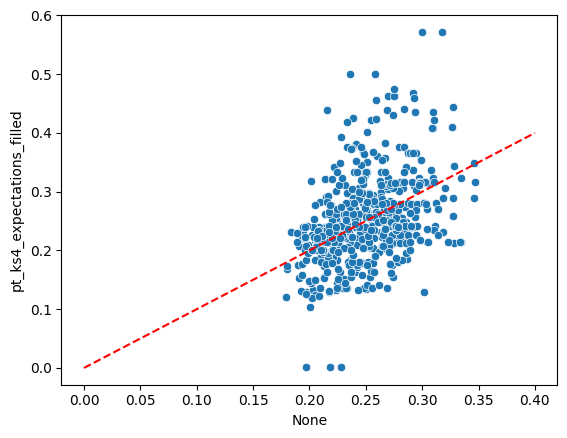

In [ ]:
#visualize model performance

sns.scatterplot(x=fit.fittedvalues, y = datatrain['pt_ks4_expectations_filled'] )
plt.plot([0, 0.4], [0, 0.4], color='red', linestyle='--')

#test mse
test_predictors = add_constant(datatest[['reporting_year','number_in_care_filled', 'ofsted_overall_filled', 'ofsted_care_filled', 'ofsted_help_protection_filled', 'ofsted_leaders_filled', 'per_child_spend', 'pt_private_provis_filled', 'pt_placed_inside_la_filled', 'pt_3_more_placemts_filled']])
mse = ((fit.predict(test_predictors)- datatest['pt_ks4_expectations_filled'])**2).mean()
print(f"Test MSE: {mse*10000:.3f}%, Test RMSE: {np.sqrt(mse*10000)}, Test RMSE / std dev.: {np.sqrt(mse*10000)/ np.std(datatest['pt_ks4_expectations_filled']*100)}")

In [ ]:
fit.predict(test_predictors)- datatest['pt_ks4_expectations_filled']

618    0.025478
53    -0.030448
289   -0.018689
221    0.071124
232   -0.014086
         ...   
712   -0.103196
244    0.034073
54     0.067511
669   -0.015178
482   -0.013385
Length: 188, dtype: float64

Text(25.222222222222214, 0.5, '% KS4 expectations prediction ')

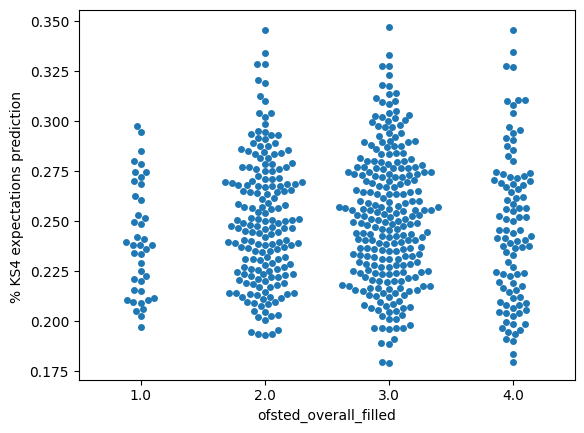

In [ ]:
sns.swarmplot(x=(datatrain.ofsted_overall_filled), y=fit.fittedvalues)
plt.ylabel("% KS4 expectations prediction ")

## % convictions

In [ ]:
model = BetaModel(endog = datatrain.pt_convictions_filled, exog = add_constant(datatrain[['reporting_year','number_in_care_filled', 'ofsted_overall_filled', 'ofsted_care_filled', 'ofsted_help_protection_filled', 'ofsted_leaders_filled', 'per_child_spend', 'pt_private_provis_filled', 'pt_placed_inside_la_filled', 'pt_3_more_placemts_filled']]))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                BetaModel Results                                
=================================================================================
Dep. Variable:     pt_convictions_filled   Log-Likelihood:                 1461.6
Model:                         BetaModel   AIC:                            -2899.
Method:               Maximum Likelihood   BIC:                            -2847.
Date:                   Sat, 20 Apr 2024                                         
Time:                           16:17:10                                         
No. Observations:                    562                                         
Df Residuals:                        550                                         
Df Model:                             10                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           283.8032     48.513      5.850      0.000     188.720     378.886
reporting_year                   -0.1421      0.024     -5.912      0.000      -0.189      -0.095
number_in_care_filled             0.9094      0.204      4.463      0.000       0.510       1.309
ofsted_overall_filled            -0.1759      0.138     -1.272      0.204      -0.447       0.095
ofsted_care_filled                0.0308      0.089      0.345      0.730      -0.144       0.206
ofsted_help_protection_filled     0.2913      0.093      3.143      0.002       0.110       0.473
ofsted_leaders_filled            -0.1787      0.093     -1.925      0.054      -0.361       0.003
per_child_spend                  -0.0266      0.332     -0.080      0.936      -0.677       0.623
pt_private_provis_filled         -0.5282      0.304     -1.740      0.082      -1.123       0.067
pt_placed_inside_la_filled       -0.5476      0.254     -2.155      0.031      -1.046      -0.050
pt_3_more_placemts_filled         0.3564      0.367      0.971      0.331      -0.363       1.076
precision                         3.7326      0.065     57.332      0.000       3.605       3.860
=================================================================================================
"""

Test MSE: 5.496%, Test RMSE: 2.3443405368851313, Test RMSE / std dev.: 0.9964478530534131


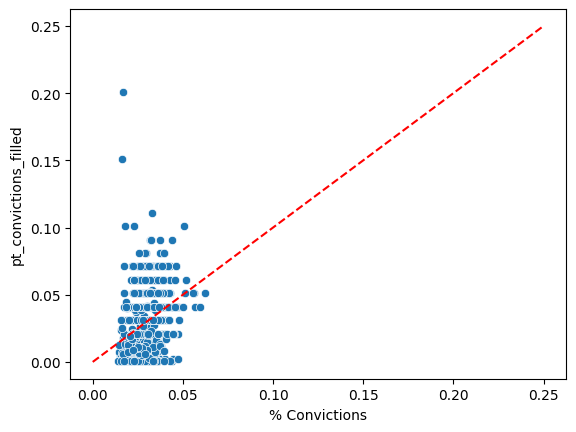

In [ ]:
#visualize model performance

sns.scatterplot(x=fit.fittedvalues, y = datatrain['pt_convictions_filled'] )
plt.plot([0, 0.25], [0, 0.25], color='red', linestyle='--')
plt.xlabel("% Convictions")

#test mse
test_predictors = add_constant(datatest[['reporting_year','number_in_care_filled', 'ofsted_overall_filled', 'ofsted_care_filled', 'ofsted_help_protection_filled', 'ofsted_leaders_filled', 'per_child_spend', 'pt_private_provis_filled', 'pt_placed_inside_la_filled', 'pt_3_more_placemts_filled']])
mse = ((fit.predict(test_predictors) - datatest['pt_convictions_filled'])**2).mean()
print(f"Test MSE: {mse*10000:.3f}%, Test RMSE: {np.sqrt(mse*10000)}, Test RMSE / std dev.: {np.sqrt(mse*10000)/ np.std(datatest['pt_convictions_filled']*100)}")

Text(33.972222222222214, 0.5, '% convictions (predicted values)')

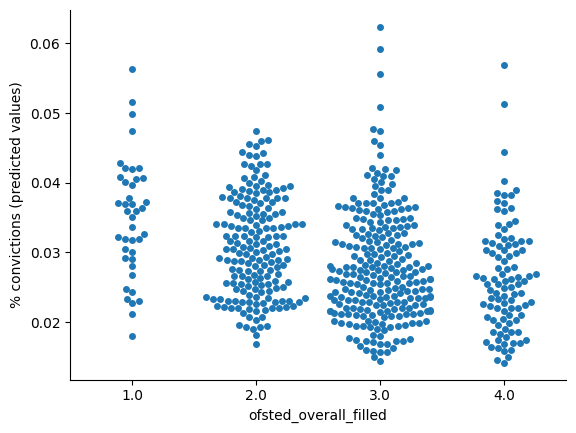

In [ ]:
sns.swarmplot(x=(datatrain.ofsted_overall_filled), y=fit.fittedvalues)
sns.despine()
plt.ylabel("% convictions (predicted values)")

##Beta regressions on unfilled data

KS2 expectations

In [ ]:
#mask out missing values from the training data
mask = (datatrain.pt_ks2_expectations.notnull()) & (datatrain.number_in_care.notnull()) & (datatrain.ofsted_overall.notnull()) &(datatrain.ofsted_care.notnull()) &(datatrain.ofsted_leaders.notnull())&(datatrain.ofsted_help_protection.notnull())& (datatrain.budget_per_child.notnull()) & (datatrain.pt_private_provis.notnull()) & (datatrain.pt_placed_inside_la.notnull()) & (datatrain.pt_3_more_placemts.notnull())

#fit the model on training data and using the unfilled columns
model = BetaModel(endog = datatrain[mask].pt_ks2_expectations, exog = add_constant(datatrain[mask][['reporting_year','number_in_care', 'ofsted_overall','ofsted_care', 'ofsted_leaders', 'ofsted_help_protection', 'budget_per_child', 'pt_private_provis', 'pt_placed_inside_la', 'pt_3_more_placemts']]))
fit = model.fit()
print(fit.summary())


#set up predictors from the test set
test_predictors = add_constant(datatest[['reporting_year', 'number_in_care', 'ofsted_overall', 'ofsted_care', 'ofsted_leaders', 'ofsted_help_protection','per_child_spend', 'pt_private_provis', 'pt_placed_inside_la', 'pt_3_more_placemts']])

#mask out missing values from test data
test_mask = (datatest.pt_ks2_expectations.notnull()) & (datatest.number_in_care.notnull()) & (datatest.ofsted_overall.notnull())&(datatest.ofsted_care.notnull()) &(datatest.ofsted_leaders.notnull()) &(datatest.ofsted_help_protection.notnull())& (datatest.budget_per_child.notnull()) & (datatest.pt_private_provis.notnull()) & (datatest.pt_placed_inside_la.notnull()) & (datatest.pt_3_more_placemts.notnull())

#calculate test mse, multiplying by 10000 as model is predicting on 0-1 scale, we want 0-100 scale
mse = ((fit.predict(test_predictors[test_mask]) - datatest[test_mask]['pt_ks2_expectations'])**2).mean()
print(f"Test MSE: {mse*10000:.3f}, RMSE {np.sqrt(mse*10000)}")


                               BetaModel Results                               
Dep. Variable:     pt_ks2_expectations   Log-Likelihood:                 49.302
Model:                       BetaModel   AIC:                            -74.60
Method:             Maximum Likelihood   BIC:                            -51.90
Date:                 Sat, 20 Apr 2024                                         
Time:                         16:17:12                                         
No. Observations:                   49                                         
Df Residuals:                       37                                         
Df Model:                           10                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    147.4540     86.043      1.714      0.087     -21.187     316.095
reporti

% substance misuse

In [ ]:
mask = (datatrain.pt_substance.notnull()) & (datatrain.number_in_care.notnull()) & (datatrain.ofsted_overall.notnull()) &(datatrain.ofsted_care.notnull()) &(datatrain.ofsted_leaders.notnull())&(datatrain.ofsted_help_protection.notnull())& (datatrain.budget_per_child.notnull()) & (datatrain.pt_private_provis.notnull()) & (datatrain.pt_placed_inside_la.notnull()) & (datatrain.pt_3_more_placemts.notnull())
model = BetaModel(endog = datatrain[mask].pt_substance, exog = add_constant(datatrain[mask][['reporting_year','number_in_care', 'ofsted_overall','ofsted_care', 'ofsted_leaders', 'ofsted_help_protection', 'budget_per_child', 'pt_private_provis', 'pt_placed_inside_la', 'pt_3_more_placemts']]))
fit = model.fit()
print(fit.summary())
test_predictors = add_constant(datatest[['reporting_year', 'number_in_care', 'ofsted_overall', 'ofsted_care', 'ofsted_leaders', 'ofsted_help_protection','per_child_spend', 'pt_private_provis', 'pt_placed_inside_la', 'pt_3_more_placemts']])
test_mask = (datatest.pt_substance.notnull()) & (datatest.number_in_care.notnull()) & (datatest.ofsted_overall.notnull())&(datatest.ofsted_care.notnull()) &(datatest.ofsted_leaders.notnull()) &(datatest.ofsted_help_protection.notnull())& (datatest.budget_per_child.notnull()) & (datatest.pt_private_provis.notnull()) & (datatest.pt_placed_inside_la.notnull()) & (datatest.pt_3_more_placemts.notnull())
mse = ((fit.predict(test_predictors[test_mask])*100 - datatest[test_mask]['pt_substance']*100)**2).mean()
print(f"Test MSE: {mse*10000:.3f}, RMSE {np.sqrt(mse*10000)}")

                              BetaModel Results                               
Dep. Variable:           pt_substance   Log-Likelihood:                 190.22
Model:                      BetaModel   AIC:                            -356.4
Method:            Maximum Likelihood   BIC:                            -326.6
Date:                Sat, 20 Apr 2024                                         
Time:                        16:17:12                                         
No. Observations:                  89                                         
Df Residuals:                      77                                         
Df Model:                          10                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -96.6532    127.204     -0.760      0.447    -345.969     152.663
reporting_year  

KS4 expectations

In [ ]:
mask = (datatrain.pt_ks4_expectations.notnull()) & (datatrain.number_in_care.notnull()) & (datatrain.ofsted_overall.notnull()) &(datatrain.ofsted_care.notnull()) &(datatrain.ofsted_leaders.notnull())&(datatrain.ofsted_help_protection.notnull())& (datatrain.budget_per_child.notnull()) & (datatrain.pt_private_provis.notnull()) & (datatrain.pt_placed_inside_la.notnull()) & (datatrain.pt_3_more_placemts.notnull())
model = BetaModel(endog = datatrain[mask].pt_ks4_expectations, exog = add_constant(datatrain[mask][['reporting_year','number_in_care', 'ofsted_overall','ofsted_care', 'ofsted_leaders', 'ofsted_help_protection', 'budget_per_child', 'pt_private_provis', 'pt_placed_inside_la', 'pt_3_more_placemts']]))
fit = model.fit()
print(fit.summary())
test_predictors = add_constant(datatest[['reporting_year', 'number_in_care', 'ofsted_overall', 'ofsted_care', 'ofsted_leaders', 'ofsted_help_protection','per_child_spend', 'pt_private_provis', 'pt_placed_inside_la', 'pt_3_more_placemts']])
test_mask = (datatest.pt_ks4_expectations.notnull()) & (datatest.number_in_care.notnull()) & (datatest.ofsted_overall.notnull())&(datatest.ofsted_care.notnull()) &(datatest.ofsted_leaders.notnull()) &(datatest.ofsted_help_protection.notnull())& (datatest.budget_per_child.notnull()) & (datatest.pt_private_provis.notnull()) & (datatest.pt_placed_inside_la.notnull()) & (datatest.pt_3_more_placemts.notnull())
mse = ((fit.predict(test_predictors[test_mask]) - datatest[test_mask]['pt_ks4_expectations'])**2).mean()
print(f"Test MSE: {mse*10000:.3f}, RMSE {np.sqrt(mse*10000)}")

                               BetaModel Results                               
Dep. Variable:     pt_ks4_expectations   Log-Likelihood:                 94.304
Model:                       BetaModel   AIC:                            -164.6
Method:             Maximum Likelihood   BIC:                            -138.2
Date:                 Sat, 20 Apr 2024                                         
Time:                         16:17:12                                         
No. Observations:                   67                                         
Df Residuals:                       55                                         
Df Model:                           10                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -64.7505     66.299     -0.977      0.329    -194.694      65.193
reporti

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


% convictions

In [ ]:
mask = (datatrain.pt_convictions.notnull()) & (datatrain.number_in_care.notnull()) & (datatrain.ofsted_overall.notnull()) &(datatrain.ofsted_care.notnull()) &(datatrain.ofsted_leaders.notnull())&(datatrain.ofsted_help_protection.notnull())& (datatrain.budget_per_child.notnull()) & (datatrain.pt_private_provis.notnull()) & (datatrain.pt_placed_inside_la.notnull()) & (datatrain.pt_3_more_placemts.notnull())
model = BetaModel(endog = datatrain[mask].pt_convictions, exog = add_constant(datatrain[mask][['reporting_year','number_in_care', 'ofsted_overall','ofsted_care', 'ofsted_leaders', 'ofsted_help_protection', 'budget_per_child', 'pt_private_provis', 'pt_placed_inside_la', 'pt_3_more_placemts']]))
fit = model.fit()
print(fit.summary())
test_predictors = add_constant(datatest[['reporting_year', 'number_in_care', 'ofsted_overall', 'ofsted_care', 'ofsted_leaders', 'ofsted_help_protection','per_child_spend', 'pt_private_provis', 'pt_placed_inside_la', 'pt_3_more_placemts']])
test_mask = (datatest.pt_convictions.notnull()) & (datatest.number_in_care.notnull()) & (datatest.ofsted_overall.notnull())&(datatest.ofsted_care.notnull()) &(datatest.ofsted_leaders.notnull()) &(datatest.ofsted_help_protection.notnull())& (datatest.budget_per_child.notnull()) & (datatest.pt_private_provis.notnull()) & (datatest.pt_placed_inside_la.notnull()) & (datatest.pt_3_more_placemts.notnull())
mse = ((fit.predict(test_predictors[test_mask]) - datatest[test_mask]['pt_convictions'])**2).mean()
print(f"Test MSE: {mse*10000:.3f}, RMSE {np.sqrt(mse*10000)}")


                              BetaModel Results                               
Dep. Variable:         pt_convictions   Log-Likelihood:                 176.68
Model:                      BetaModel   AIC:                            -329.4
Method:            Maximum Likelihood   BIC:                            -302.7
Date:                Sat, 20 Apr 2024                                         
Time:                        16:17:12                                         
No. Observations:                  68                                         
Df Residuals:                      56                                         
Df Model:                          10                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    170.5981    142.249      1.199      0.230    -108.206     449.402
reporting_year  